In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from matplotlib import transforms, pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
GRAY4, GRAY7 = '#646369', '#929497'

In [2]:
df = pd.read_csv("~/Desktop/lowHigh.csv")
ar = df.values
arT = ar.T
toBeDelete = []
for i in range(2,arT.shape[0]):
    tmp = arT[i]
    count = 0
    for j in range(arT.shape[1]):
        if tmp[j] < 1e-6:
            count = count + 1
    if count > (arT.shape[1]-2):
        print(i, count)
        toBeDelete.append(i)
df.drop(df.columns[toBeDelete], axis=1, inplace=True)

2 48
23 48
24 47
25 48
26 48
40 47
45 48
65 47
68 48
69 48
71 47
75 48


In [3]:
df['Risk'] = pd.get_dummies(df['Risk'])['Low-risk']
features = df.columns.values.tolist()
features.remove('Risk')
features.remove('Sample Name')
target = 'Risk'
df[features + [target]]

,GSSG,8-OH-dG,GSH,L-Leucine,L-Kynurenine,L-Tryptophan,5-HTP,Cholic acid,N-phenylacetylglycine,5-HT,...,PE(36:4),glutamine,betaine,histidine,methionine,pyroglutamic acid,benzene acetyl glycine,N6-acetyl lysine,nicotinamide,Risk
0,0.00000,0.6380,0.01150,282.0,0.539,11.70,0.02760,0.00000,0.2270,0.475,...,2.64,0.01840,67.6,0.03370,0.000000,0.00,0.000,10.50,0.07820,1
1,0.00000,0.2440,0.01670,485.0,1.060,14.50,0.02680,0.02270,0.2130,0.582,...,3.78,0.02340,101.0,0.09850,0.000000,0.00,0.000,13.40,0.01340,1
2,0.00436,0.5350,0.00427,256.0,0.894,7.78,0.01310,0.00990,0.2990,0.600,...,2.79,0.01740,86.5,0.03600,0.000000,0.00,0.000,12.30,0.00899,1
3,0.00000,0.2440,0.00477,356.0,0.529,12.40,0.01700,0.00000,0.2850,0.767,...,2.88,0.00487,59.2,0.04990,0.000000,0.00,0.000,10.80,0.00000,1
4,0.00000,0.0840,0.00236,286.0,0.532,7.22,0.04490,0.00000,0.2200,0.524,...,3.07,0.00485,56.0,0.03670,0.000000,0.00,0.000,10.60,0.00000,1
5,0.00000,0.4770,0.00841,420.0,0.650,11.70,0.02240,0.02350,0.9690,0.343,...,3.46,0.01680,44.7,0.05810,0.000000,0.00,0.000,14.40,0.00000,1
6,0.00000,2.6200,0.01520,475.0,2.520,13.40,0.03420,0.00000,0.0957,0.784,...,6.36,0.08630,49.1,0.12200,0.000000,0.00,0.000,29.50,0.00000,1
7,0.00000,0.4170,0.01170,365.0,0.618,11.60,0.04530,0.00000,0.3520,0.559,...,3.51,0.02130,51.7,0.04790,0.000000,0.00,0.000,14.50,0.00000,1
8,0.00000,0.4230,0.01170,297.0,0.397,8.07,0.02100,0.00000,0.2490,0.328,...,2.84,0.02340,59.4,0.05610,0.000000,0.00,0.000,11.10,0.01510,1
9,0.00000,0.1980,0.01330,383.0,0.576,12.00,0.06650,0.00000,0.1850,1.010,...,3.38,0.00000,46.6,0.04520,0.000000,0.00,0.000,16.10,0.00000,1


In [4]:
# features.remove('L-Tryptophan')
# features.remove('Hippuric acid')
# features.remove('Glutamic')

In [5]:
X, y = df[features].values, df[target].values

In [6]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df[features], df[[target]], test_size=0.2, stratify=df[[target]])

# print ("number of training samples: ", len(X_train))
# print ("number of test samples: ", len(y_test))

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5000, 
                               random_state=507, 
                               max_features = 'sqrt',
                               )

model.fit(X, y.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=507,
                       verbose=0, warm_start=False)

In [8]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {(np.mean(n_nodes))}')
print(f'Average maximum depth {(np.mean(max_depths))}')

Average number of nodes 8.2076
Average maximum depth 2.9342


In [9]:
fi = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)


In [10]:
fi.head(60)

,feature,importance
57,histidine,0.111196
54,PE(36:4),0.081462
47,LPC(20:1),0.074269
19,Ascorbic acid,0.070832
22,Cl-Tyr,0.062642
8,N-phenylacetylglycine,0.051822
5,L-Tryptophan,0.046704
28,Glutamic,0.042738
51,Hexanoylcarnitine,0.039309
40,Taurine,0.038407


In [11]:
fi.head(60)

,feature,importance
57,histidine,0.111196
54,PE(36:4),0.081462
47,LPC(20:1),0.074269
19,Ascorbic acid,0.070832
22,Cl-Tyr,0.062642
8,N-phenylacetylglycine,0.051822
5,L-Tryptophan,0.046704
28,Glutamic,0.042738
51,Hexanoylcarnitine,0.039309
40,Taurine,0.038407


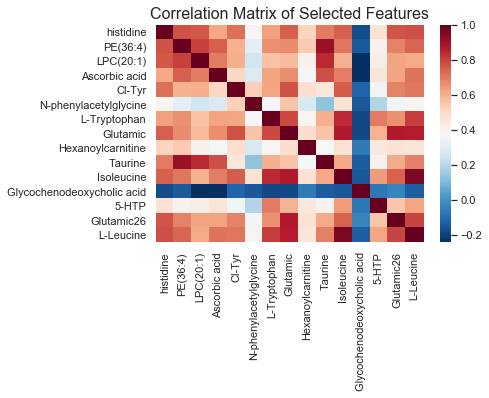

In [12]:
selected = fi.head(15)
corr_numeric = df[selected.values.T[0]].corr()
sns.set(font_scale=1)
sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix of Selected Features", fontsize=16,)

plt.show() 

In [13]:
sum(fi.values.T[1])

1.0000000000000007

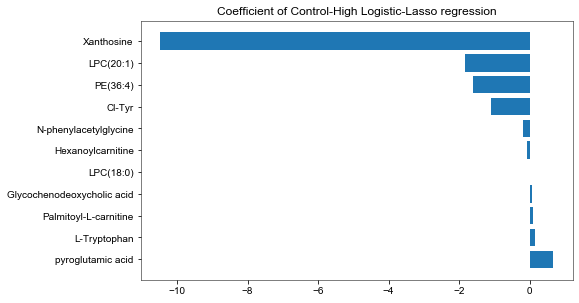

In [10]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    plt.figure(figsize=(8, 4.5))
    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.title('Coefficient of Control-High Logistic-Lasso regression')
    plt.subplots_adjust(left=0.2, bottom=0.1, right=0.95, top=0.9, wspace=0, hspace=0)
    plt.yticks(range(top), names[::-1][0:top], fontsize=10)
    plt.savefig("controlhigh.pdf")
    plt.show()
coeff = [0.161294824,  -0.192883457,  -1.101686690,   0.107638918, -10.475796821,   0.001866959,-1.824504957 , 0.079702093 , -0.068161977 , -1.618168858,   0.663198915]
feature_names = ["L-Tryptophan","N-phenylacetylglycine", "Cl-Tyr", "Palmitoyl-L-carnitine","Xanthosine", "LPC(18:0)" , "LPC(20:1)","Glycochenodeoxycholic acid", "Hexanoylcarnitine"  , "PE(36:4)"  ,"pyroglutamic acid"
]
f_importances(coeff, feature_names)

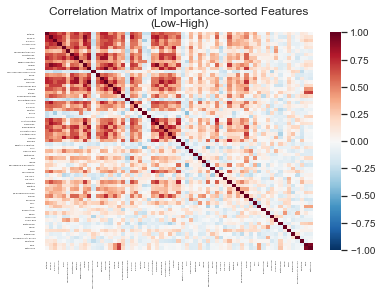

In [11]:


corr_numeric = df[fi.values.T[0]].corr()
sns.set(font_scale=0.2)
ax = sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r", vmin=-1, vmax=1)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.title("Correlation Matrix of Importance-sorted Features\n(Low-High)", fontsize=12)

plt.savefig("CorrMatLH.pdf")
plt.show() 